In [12]:
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# import seaborn as sns

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [13]:
data = pd.read_csv('../../data/processed-v2.csv')

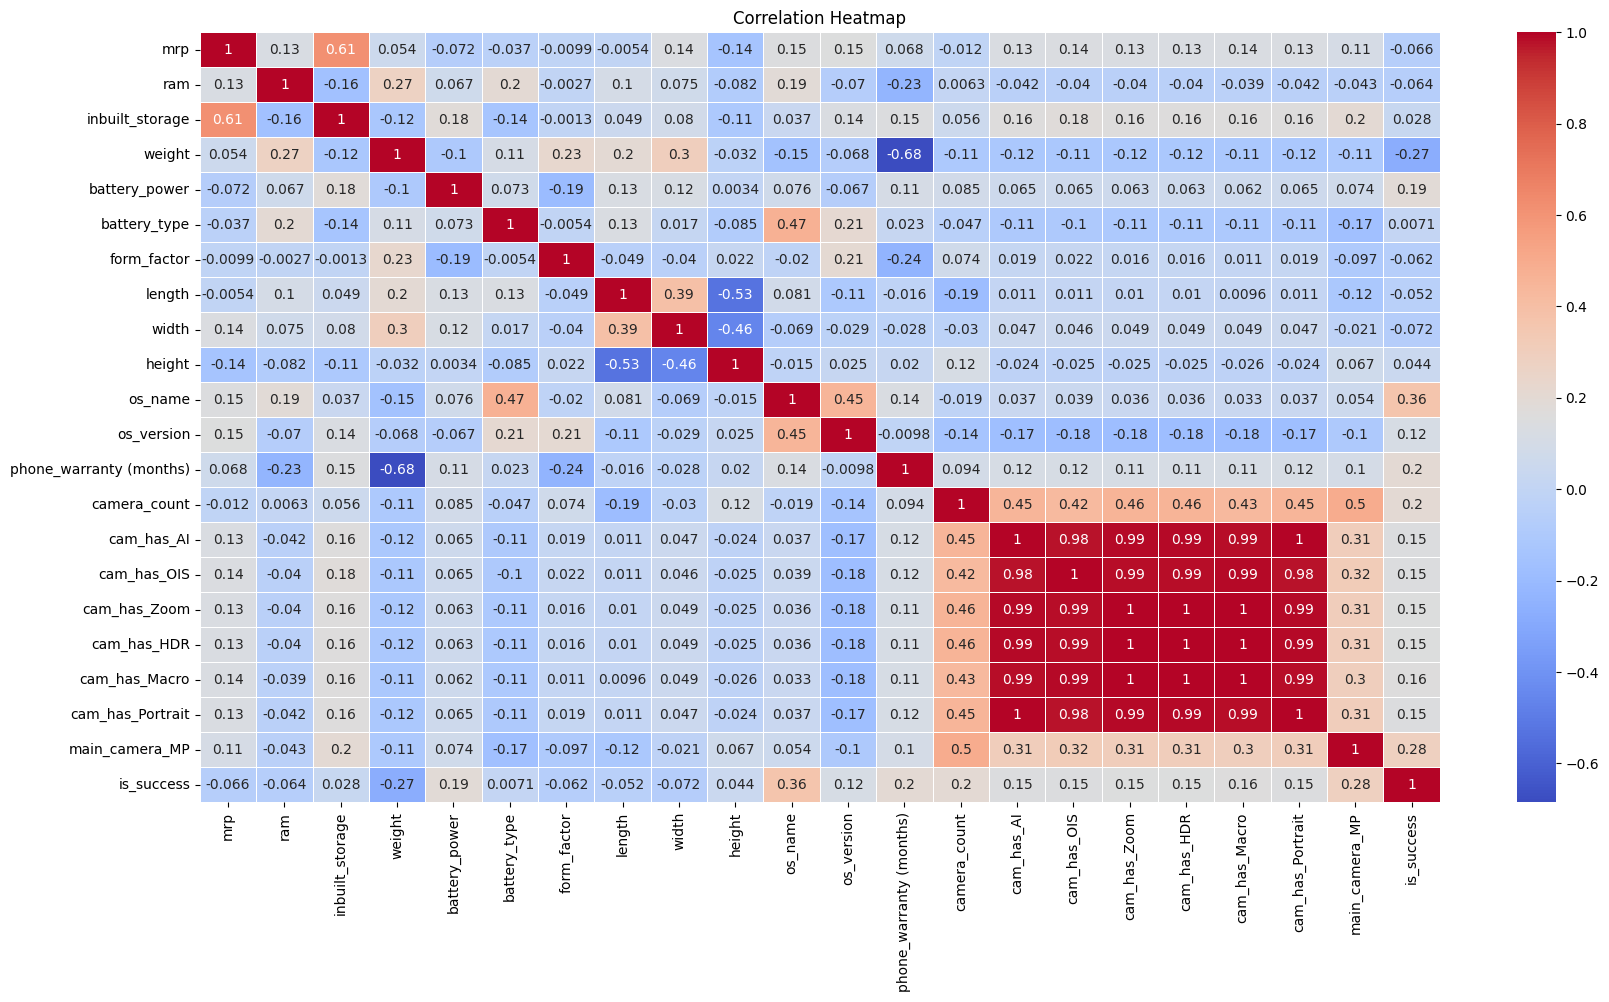

In [14]:
correlation_matrix = data.drop(columns=["product_id"]).corr()

# Create the heatmap
plt.figure(figsize=(20, 10))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [15]:
data.dtypes

product_id                  object
mrp                          int64
ram                          int64
inbuilt_storage              int64
weight                       int64
battery_power                int64
battery_type                 int64
form_factor                  int64
length                     float64
width                      float64
height                     float64
os_name                      int64
os_version                 float64
phone_warranty (months)      int64
camera_count                 int64
cam_has_AI                   int64
cam_has_OIS                  int64
cam_has_Zoom                 int64
cam_has_HDR                  int64
cam_has_Macro                int64
cam_has_Portrait             int64
main_camera_MP               int64
is_success                    bool
dtype: object

IndexError: index 2 is out of bounds for axis 0 with size 2

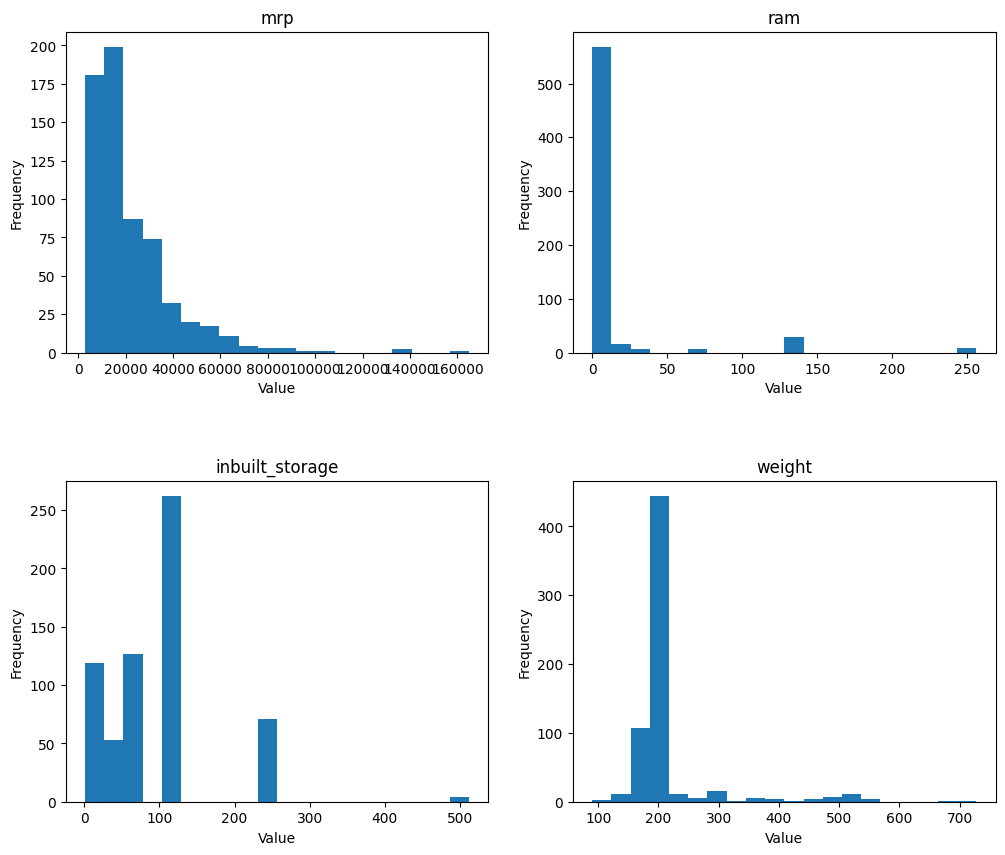

In [19]:
# Set up the figure and axis objects
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.4)

# Define numeric columns
numeric_cols = ['mrp', 'ram', 'inbuilt_storage', 'weight', 'battery_power', 'length', 'width', 'height',
                'os_version', 'phone_warranty (months)', 'camera_count', 'main_camera_MP']
num_plots = len(numeric_cols)
num_rows = 2
num_cols = 2

# Plot histograms for numeric columns
for i, col in enumerate(numeric_cols):
    ax = axes[i // num_cols, i % num_cols]
    ax.hist(data[col], bins=20)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    if i == num_plots - 1:
        ax.axis('off')  # Hide the empty subplot if the number of columns is not a perfect square

# Show the histogram plots
plt.tight_layout()
plt.show()

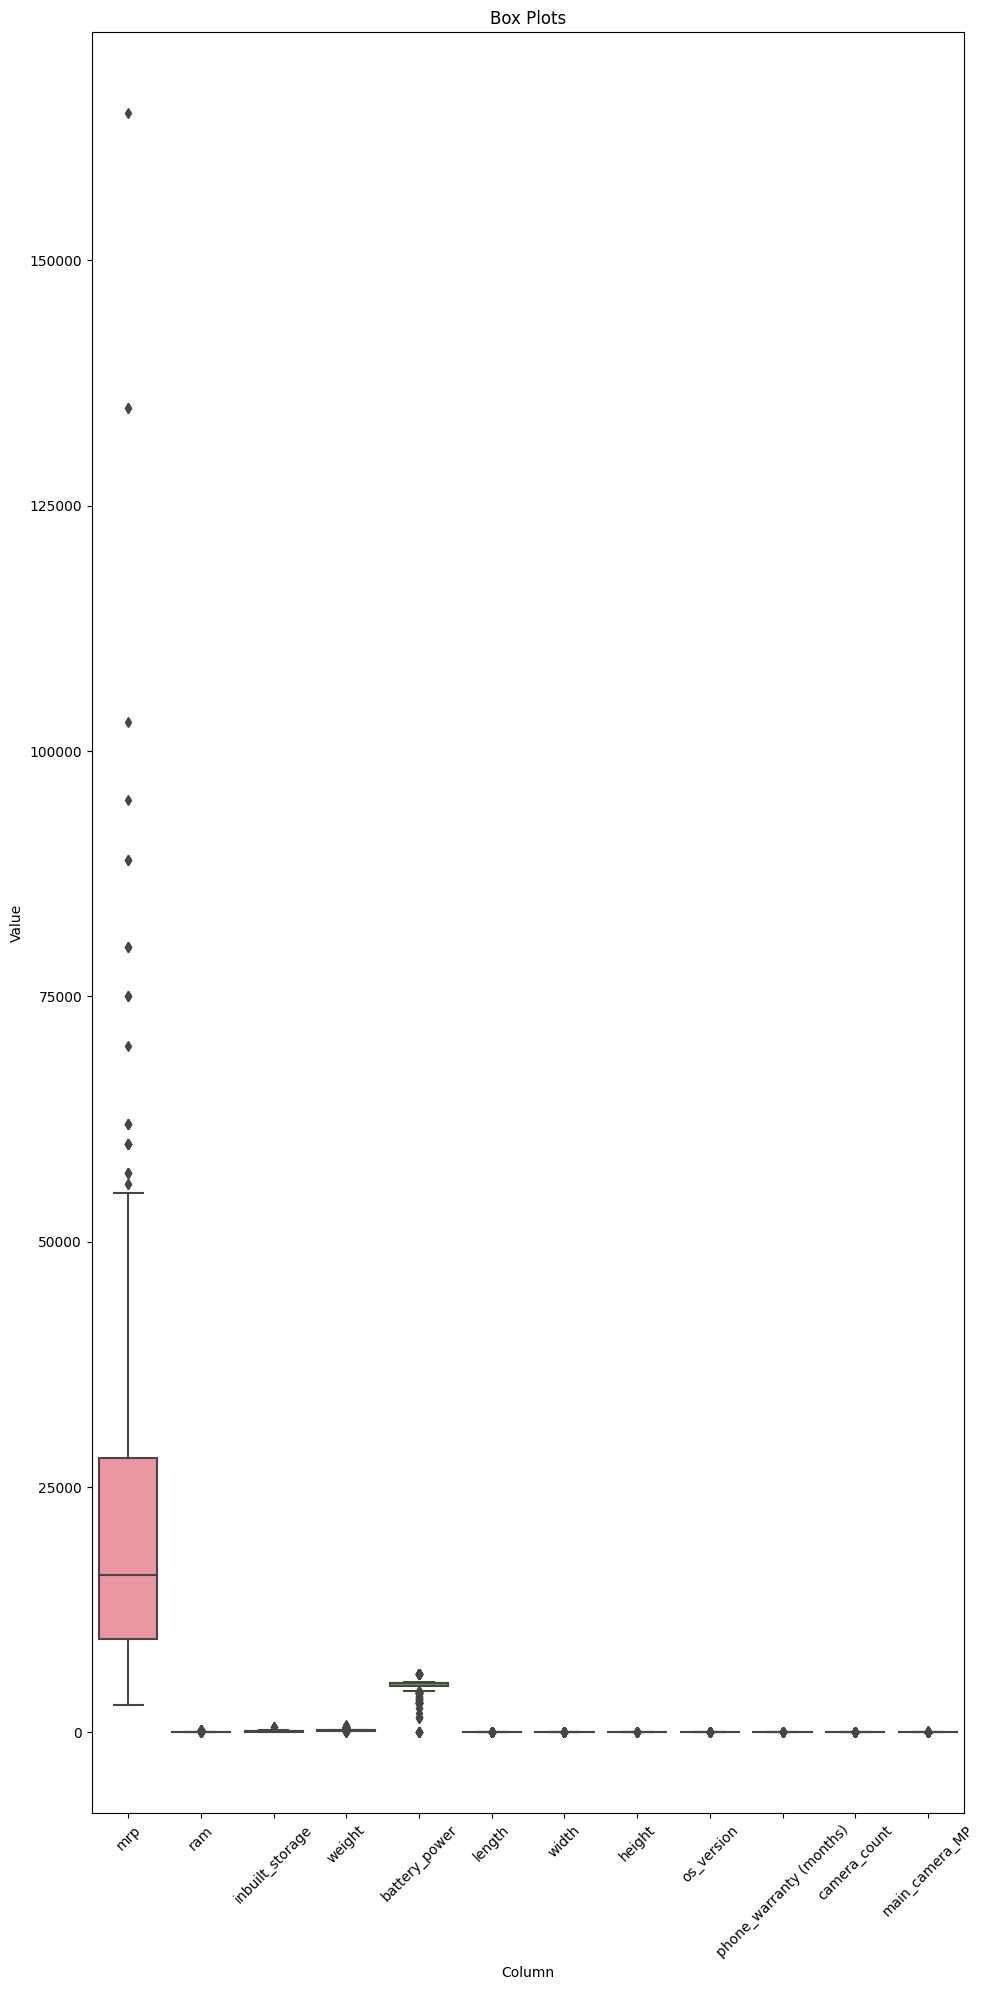

In [22]:
# Create a box plot for numeric columns
plt.figure(figsize=(10, 20))
sns.boxplot(data=data[numeric_cols])
plt.title('Box Plots')
plt.xticks(rotation=45)
plt.xlabel('Column')
plt.ylabel('Value')

# Show the box plot
plt.tight_layout()
plt.show()

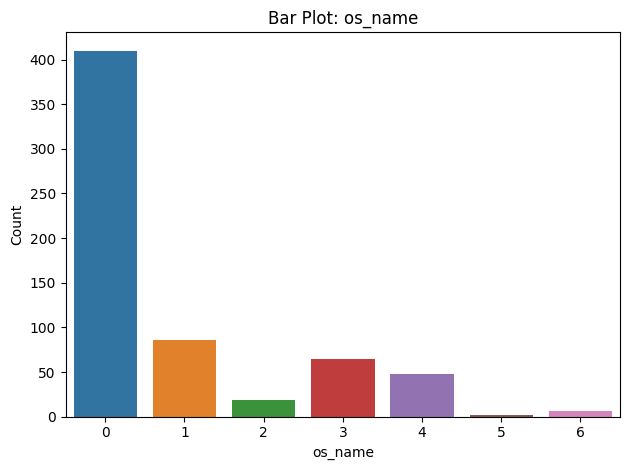

In [23]:
# Define categorical columns
categorical_cols = ['os_name', 'battery_type', 'form_factor']

# Create a bar plot for the first categorical column
sns.countplot(data=data, x=categorical_cols[0])
plt.title('Bar Plot: ' + categorical_cols[0])
plt.xlabel(categorical_cols[0])
plt.ylabel('Count')

# Show the bar plot
plt.tight_layout()
plt.show()

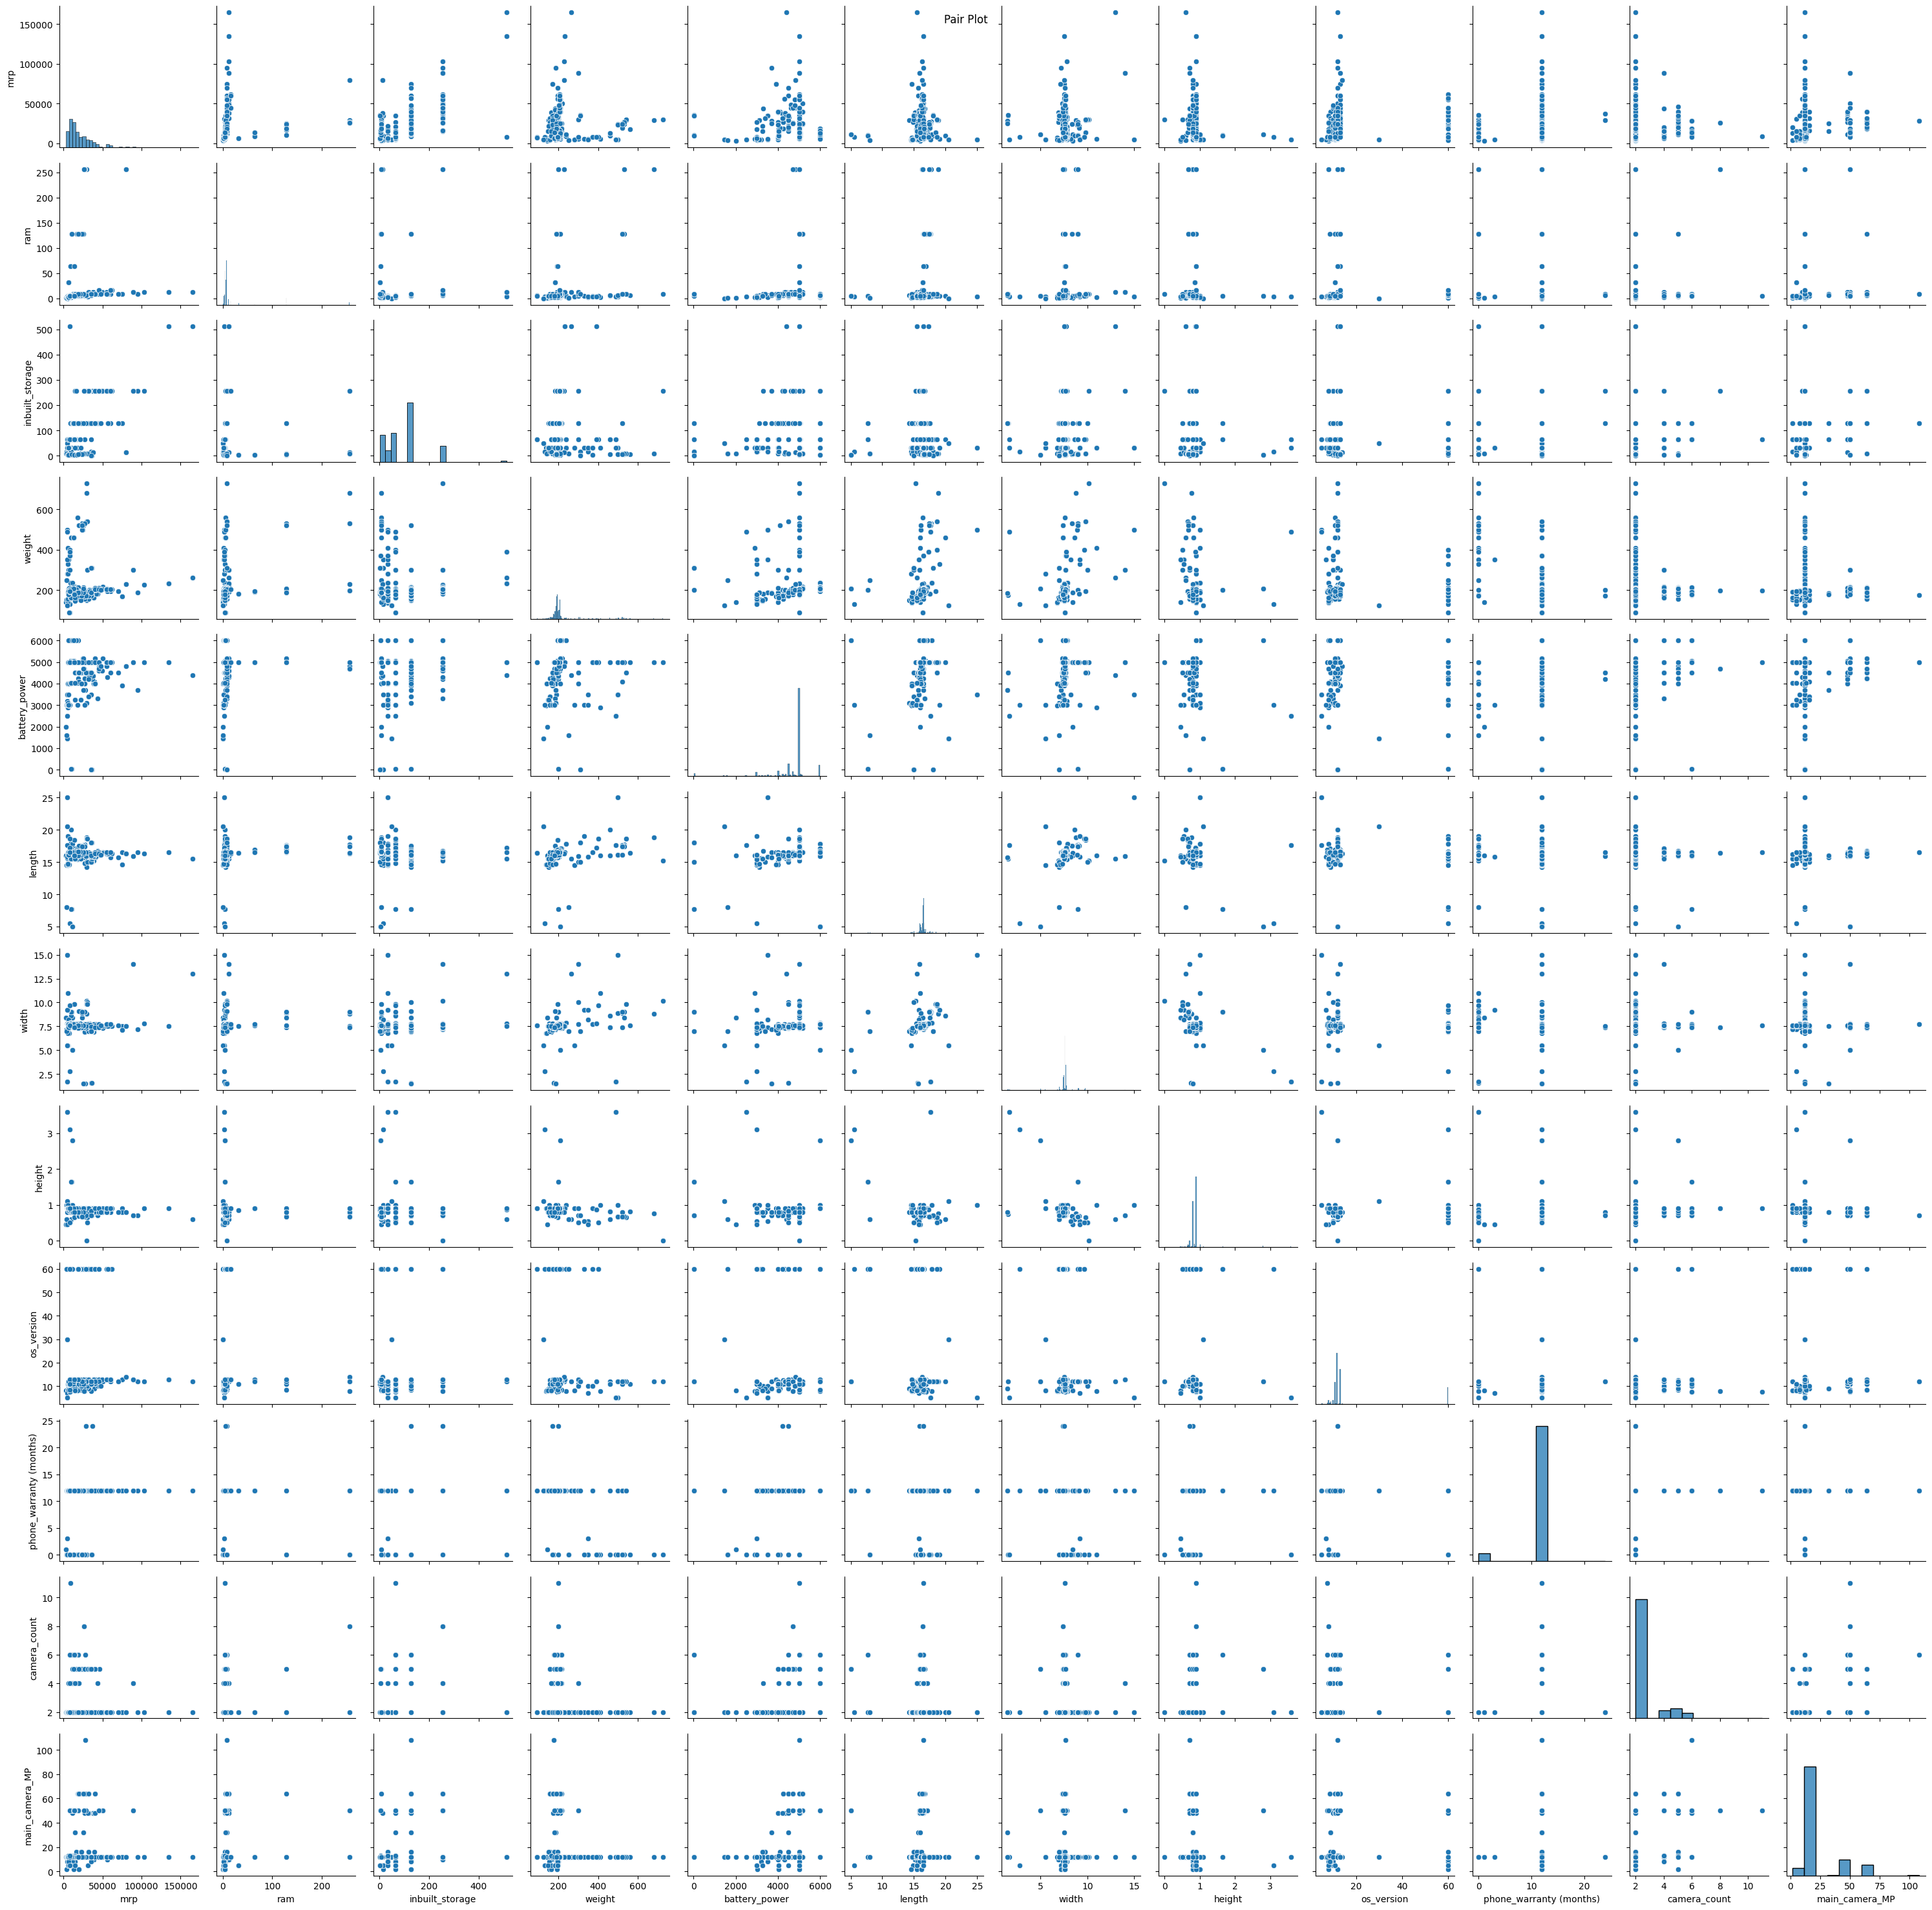

In [24]:
# Create a pair plot for numeric columns
sns.pairplot(data[numeric_cols])
plt.suptitle('Pair Plot')

# Show the pair plot
plt.tight_layout()
plt.show()